In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#source_folder = "//home//pc19d//Downloads//hw3//"
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw5"

In [3]:
os.listdir(os.path.join(source_folder,"satimage"))

['sat.doc',
 'sat.trn',
 'sat.tst',
 'X.dat',
 'Xtest.dat',
 'Y.dat',
 'Ytest.dat',
 '~$sat.doc']

### PreProcessing

In [102]:
def Preprocess(dataset,delimiter):

    Train_data  = np.genfromtxt(os.path.join(source_folder,dataset,"X.dat"),delimiter = delimiter)
    Train_label = np.genfromtxt(os.path.join(source_folder,dataset,"Y.dat"))
    Test_data   = np.genfromtxt(os.path.join(source_folder,dataset,"Xtest.dat"),delimiter=delimiter)
    Test_label  = np.genfromtxt(os.path.join(source_folder,dataset,"Ytest.dat"))
 
    Train_label = np.array(["C"+str(i) for i in Train_label]).reshape(-1,1)
    Test_label  = np.array(["C"+str(i) for i in Test_label]).reshape(-1,1)
    
    #Train_data = np.hstack((Train_data,Train_label))
    #Test_data  = np.hstack((Test_data,Test_label))
    Columns   = ["X"+str(i+1) for i in range(Train_data.shape[1])]
    train_df  = pd.DataFrame(data=Train_data,columns = Columns)
    test_df   = pd.DataFrame(data=Test_data,columns  = Columns)
    train_df["Y"]  = Train_label
    test_df["Y"]   = Test_label
        
    return train_df,Train_label,test_df,Test_label

In [103]:
dataset  = str("satimage")
train_df,_,test_df,_ = Preprocess(dataset,delimiter="")

In [104]:
train_df.to_csv('train.csv',index=False)

In [105]:
test_df.to_csv('test.csv',index=False)

# To plot

,0,1,2,3,4,5,6,7,8,9,10,11
0,Decision Tree (J48),Random Forest(100 tree),Random Forest(300 tree),Logistic Regression,Naïve Bayes,AdaBoost (20 Tree),AdaBoost (100 test),LogitBoost(10),LogitBoost(100),"LogitBoost(100,95%)",LogitBoost(25 M5P),"SVM, C= 20,gamma = 10"


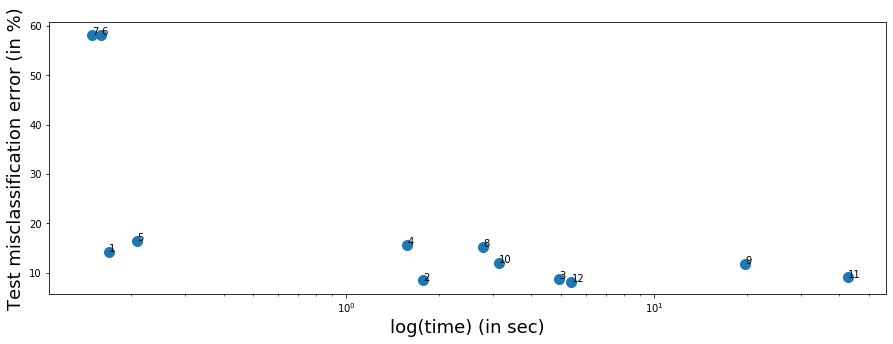

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

time  = np.array([0.17,1.78,4.93,1.58,0.21,0.16,0.15,2.79,19.77,3.14,42.55,5.39])
error = np.array([14.2232,8.42,8.7527,15.6455,16.5208,58.25,58.25,15.3,11.85,12.05,9.1,8.2])
label = np.array(["Decision Tree (J48)","Random Forest(100 tree)","Random Forest(300 tree)","Logistic Regression","Naïve Bayes","AdaBoost (20 Tree)",
"AdaBoost (100 test)","LogitBoost(10)","LogitBoost(100)","LogitBoost(100,95%)","LogitBoost(25 M5P)","SVM, C= 20,gamma = 10"])
index = [i+1 for i in range(len(label))]

ax.scatter(time,error,s=100)
ax.set_xscale('log')
ax.set_xlabel("log(time) (in sec)",fontsize=18)
ax.set_ylabel("Test misclassification error (in %)",fontsize=18)

for i, txt in enumerate(index):
    ax.annotate(str(txt), (time[i], error[i]))#,xytext=(0,10))#, # distance from text to points (x,y))

pd.DataFrame([label])